In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , LSTM , Dense , Dropout 


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vaibhavgupta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [144]:
df = pd.read_csv('netflix_reviews.csv')
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,71748cd9-4f49-4997-9bec-5c6daab1285b,NITESH KUMAR MISRA,Ghooskar Pandat naam ki web series banane walo...,1,0,9.51.0 build 6 63840,2026-02-06 10:08:48,9.51.0 build 6 63840
1,217089ad-8c2e-43cc-be90-d58c83c99f0b,Serena Alleyne,I was unable to watch any of my shows or movies,2,0,NaN,2026-02-06 10:00:18,NaN
2,fa88e2d6-5633-4c63-869c-e9a086e6ae50,Puteri Diana,Amazing streaming app with high-quality movies...,5,0,NaN,2026-02-06 09:44:12,NaN
3,c617bd79-6afb-4f5a-a634-cb41ef4b81f7,Brown Tochukwu,"the App does not want to install in my phone, ...",5,0,9.51.0 build 6 63840,2026-02-06 09:31:31,9.51.0 build 6 63840
4,ae7dc182-007e-4bef-9489-757a12309130,janie pricila,uninstall downloads uninstall download tetap x...,1,0,NaN,2026-02-06 09:25:42,NaN


In [145]:
df.drop(columns = ['reviewId','userName','reviewCreatedVersion','at','appVersion'],inplace=True)

In [146]:
df.head()

,content,score,thumbsUpCount
0,Ghooskar Pandat naam ki web series banane walo...,1,0
1,I was unable to watch any of my shows or movies,2,0
2,Amazing streaming app with high-quality movies...,5,0
3,"the App does not want to install in my phone, ...",5,0
4,uninstall downloads uninstall download tetap x...,1,0


In [147]:
def text_preprocessing(text):
    text = text.lower()
    text = re.sub(r'<.*?>','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'\d+','',text)
    emoji_pattern = re.compile(
        '['
        "\U0001F600-\U0001F64F"  
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"   
        "\U0001F1E0-\U0001F1FF"  
        "\U00002500-\U00002BEF" 
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642"
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"
        "\u3030"
        ']+',flags = re.UNICODE 
    )
    text = emoji_pattern.sub(r'',text)
    return text 
df['cleaned_contents']= df['content'].astype(str).apply(text_preprocessing)


In [148]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(df['cleaned_contents'])

In [149]:
sia  = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound']>= 0.05:
        return('Positive')
    if scores['compound']<= -0.05:
        return('Negative')
    else:
        return('Neutral')

df['sentiment'] = df['cleaned_contents'].apply(get_sentiment)


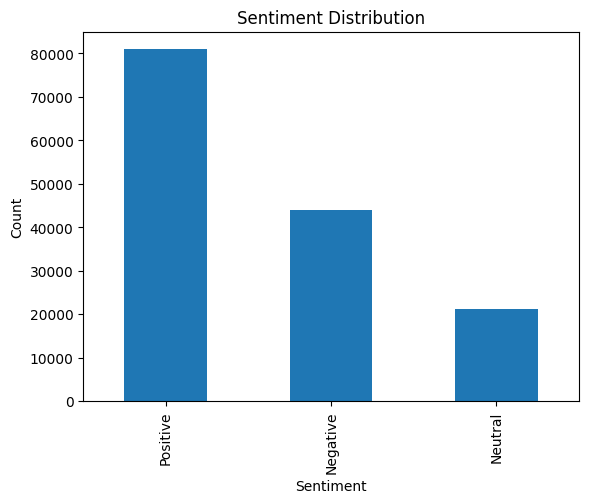

In [150]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

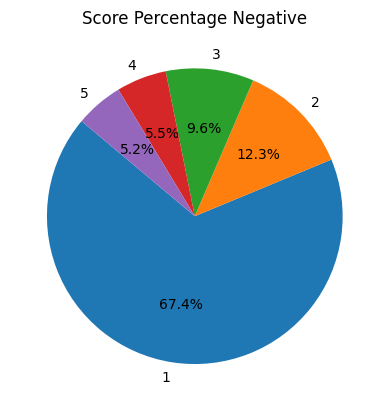

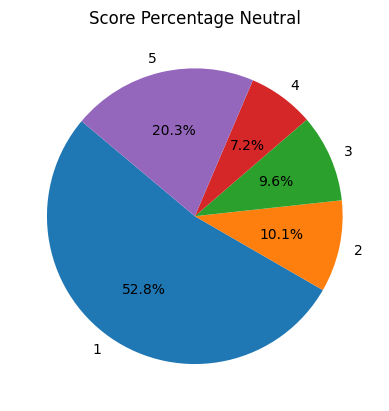

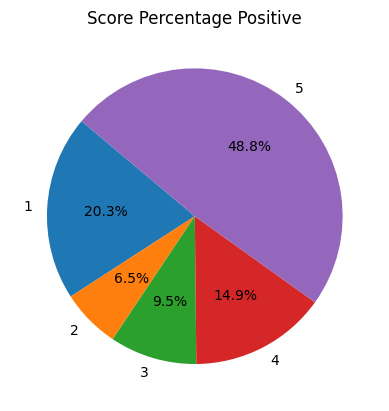

In [151]:
sentiment_score = df.groupby(['sentiment','score']).size().unstack()

for sentiment in sentiment_score.index:
    sentiment_counts = sentiment_score.loc[sentiment]
    plt.pie(sentiment_counts , labels = sentiment_counts.index , autopct='%1.1f%%',startangle = 140)
    plt.title(f"Score Percentage {sentiment}")
    plt.show()

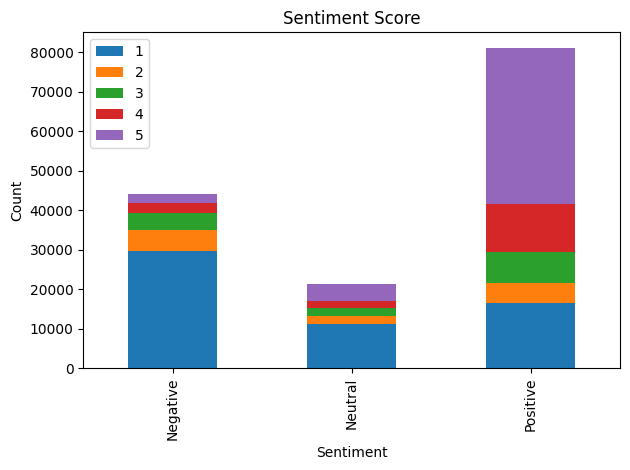

In [152]:
sentiment_score = df.groupby(['sentiment','score']).size().unstack()

sentiment_score.plot(kind='bar',stacked=True)

plt.title('Sentiment Score')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

In [153]:
from tensorflow.keras import Sequential , layers
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

In [154]:
max_len = 100
max_features =20000
test_size = 0.2

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['cleaned_contents'])
sequences = tokenizer.texts_to_sequences(df['cleaned_contents'])

X = pad_sequences(sequences , maxlen=max_len)
sentiment_label_map={'Positive':0,'Negative':1,'Neutral':2}

y = df['sentiment'].map(sentiment_label_map).values
y = to_categorical(y, num_classes=3)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=test_size,random_state=42)

X_train , y_train = shuffle(X_train,y_train, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(117000, 100)
(117000, 3)
(29250, 100)
(29250, 3)


In [155]:
print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 2425   41  610    1  274  150  597   14  109   30  150 2593   36  362
  112  829  103   11  161   43   30    3  462   48  250  768   12   97
   67    9]


In [156]:
#MODEL ARCHITECTURE
'''
EMBEDDING
|
CONVOLUTONAL LAYER 1D
|
MAX POOLING 1D LAYER
|
LONG SHORT TERM MEMORY
|
DENSE LAYER
'''

'\nEMBEDDING\n|\nCONVOLUTONAL LAYER 1D\n|\nMAX POOLING 1D LAYER\n|\nLONG SHORT TERM MEMORY\n|\nDENSE LAYER\n'

In [157]:
from keras.models import Sequential
from keras.layers import Embedding , LSTM , Dense , Dropout , Conv1D , MaxPooling1D , GlobalMaxPooling1D
from keras.optimizers import Adam , RMSprop
from keras import layers 

In [158]:

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

In [159]:
model = Sequential()
model.add(Embedding(input_dim = max_features , output_dim = 128 , input_length = max_len))
model.add(Conv1D(64,5,activation='relu'))
model.add(MaxPooling1D(5))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))

model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [161]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks (early stopping and learning rate scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5)

# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
 18/732 ━━━━━━━━━━━━━━━━━━━━ 8:28 712ms/step - accuracy: 0.5166 - loss: 1.0241

KeyboardInterrupt: 

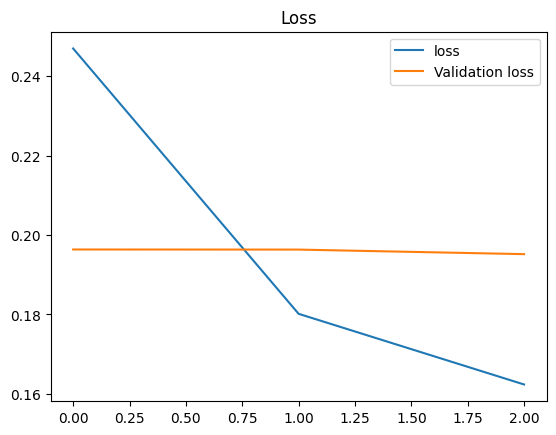

KeyError: 'accuracy'

In [160]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'] , label='Acurracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [111]:
loss , accuracy = model.evaluate(X_train , y_train , batch_size = 32)
print(f'Loss :{loss}')
print(f'Accuracy : {accuracy}')

3657/3657 ━━━━━━━━━━━━━━━━━━━━ 165s 45ms/step - Accuracy: 0.9486 - loss: 0.1538
Loss :0.1537681519985199
Accuracy : 0.9486239552497864


915/915 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step


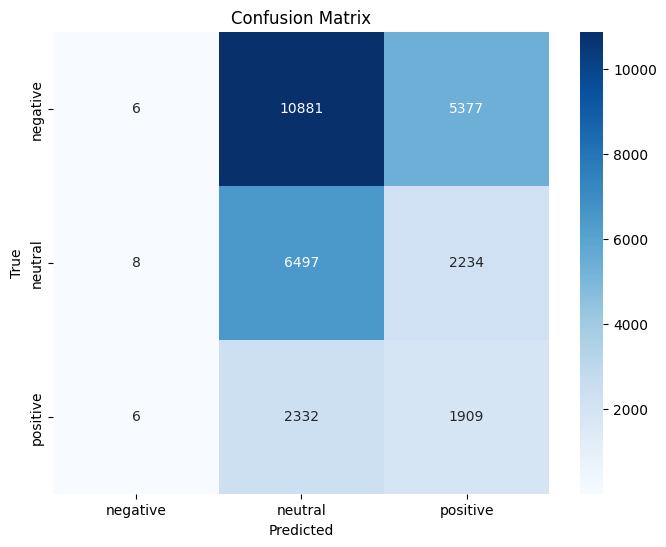

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.00      0.00     16264
           1       0.33      0.74      0.46      8739
           2       0.20      0.45      0.28      4247

    accuracy                           0.29     29250
   macro avg       0.28      0.40      0.24     29250
weighted avg       0.29      0.29      0.18     29250



In [141]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the sentiment on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Convert true labels (y_test) from one-hot encoding to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Classification Report
class_report = classification_report(y_true_labels, y_pred_labels, target_names=['negative', 'neutral','positive'])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print Classification Report
print("Classification Report:\n", class_report)

In [163]:
import pickle
with open ('review.pkl','wb') as f :
    pickle.dump(model,f)
print('model saved')

model saved
